# Case Study Project - Food Claims Process
## Company Background
Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. For example, they blame
Vivendo for suspected food poisoning.

The legal team, who processes these claims, is currently split across four locations. The new
head of the legal department wants to see if there are differences in the time it takes to close
claims across the locations.

Python programming language is used for this case study.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

claims = pd.read_csv('claims.csv')

## Dataset Validation

The dataset contains one row for each claim. The dataset has 98 rows and 8 clumns. The columns are as follows. claims.dtypes is used to find the type of each column.
Using isna() method we can see that there are 78 null values in the *Cause* column.
We use describe() method to find the types of each column.

**Claim ID:** Character, the unique identifier of the claim.

This column type is object and the number of unique items in this is equal to 98. So, the ID for each claim is unique, and there are no duplicated IDs.

**Time to Close** Numeric, number of days it took for the claim to be closed.

This column type is int64. We checked to see if all the rows are positive numbers. Number of days for the row number 58 is -57 which is invalid. There could have been an error while entring the data. We change it the number of days for this row to 57.


In [5]:
claims.at[58,'Time to Close'] = 57

**Claim Amount** Numeric, initial claim value in the currency of Brazil. For example, “R$50,000.00” should be converted into 50000.

The initial type for this column is object. We change this column to int type using rstrip(), lstrip(), replace(), and astype() methods.


In [6]:
claims['Claim Amount'] = claims['Claim Amount'].map(lambda x: x.rstrip('0').lstrip('R$').replace(',',''))
claims['Claim Amount'] = claims['Claim Amount'].map(lambda x: x.rstrip('.'))
claims['Claim Amount'] = claims['Claim Amount'].astype(int)

**Amount Paid** Numeric, total amount paid after the claim closed in the
currency of Brazil.

The data type is float64. So, we do not need to change the type. Also, the minimum amount in thi column is 999.68 which is a positive number. We do not change this column. 

**Location** Character, location of the claim, one of “RECIFE”, “SAO LUIS”,
“FORTALEZA”, or “NATAL”.

We check the Locaton column values to see if any of them hase a value other than the mentioned ones using isin() method. The results show that all the rows are valid.

**Individuals on Claim** Numeric, number of individuals on this claim.

Data type is int64. We have 7 rows with values equal to 0. We do not make any changes now, but it needs to be investigated later. The reason could be that the value is missing or there is another meaning behind that.

**Linked Cases** Binary, whether this claim is believed to be linked with other
cases, either TRUE or FALSE.

The type is boolean. We do not make any changes.

**Cause** Character, the cause of the food poisoning injuries, one of
‘vegetable’, ‘meat’, or ‘unknown’.
Replace any empty rows with ‘unknown’

After replacing the null values with fillna(), we check the validity of the values to see if they are in the mentioned strings set. We can see in 8 rows this value is 'vegetables' instead of 'vegetable'. We will fix this problem by using loc() method.

In [ ]:
claims.loc[claims['Cause'] == 'vegetables','Cause'] = 'vegetable'
# replace null with 'Unknown'
claims = claims.fillna('unknown')

## Data Discovery and Visualization

### 1- How does the number of claims differ across locations?

The number of claims for each location and the bar chart show that SAO LUIS has the highest number of claims where NATAL has the lowest. Also, RECIFE has higher number of claims compared to FORTALEZA.

| Location | Number of Claims |
|---|---|
| FORTALEZA | 22 | 
| NATAL | 21 | 
| RECIFE | 25 | 
| SAO LUIS | 30 | 


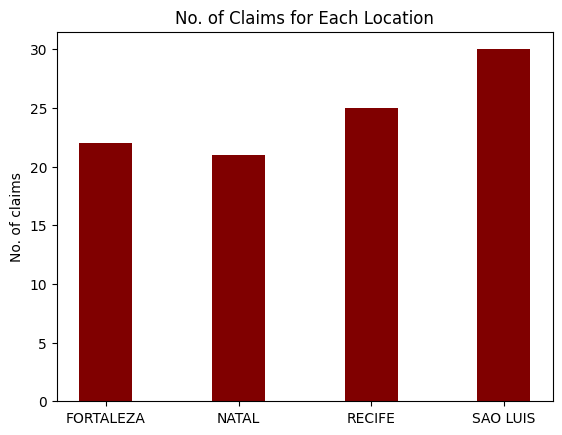

In [9]:
claim_count = claims.groupby('Location')['Claim ID'].count()
plt.bar(claim_count.index, claim_count, color ='maroon', width = 0.4)
plt.ylabel("No. of claims")
plt.title("No. of Claims for Each Location")
plt.show()

### 3- What is the distribution of time to close claims?

The following density plot shoes the distribution of time to close the claims, which is a right-skewed distribution. The sample mean and mode are 833.51 and 120, respectively, which match the distribution to be right-skewed.

|Statistic|Values|
|---|---|
|count |     98.000000|
|mean  |    833.510204|
|std   |    685.424441|
|min   |     29.000000|
|25%   |    340.750000|
|50%   |    638.500000|
|75%   |   1138.750000|
|max   |   3591.000000|


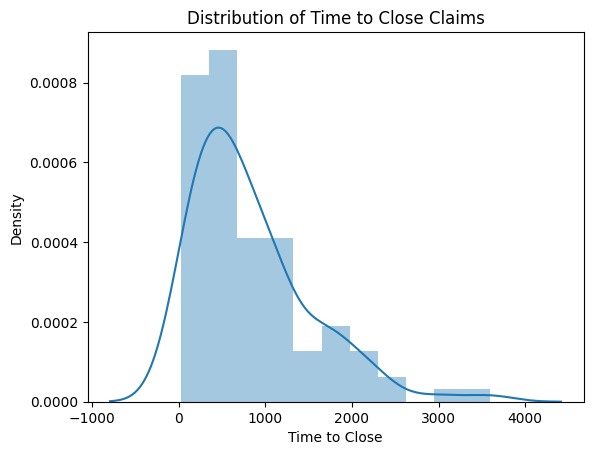

In [10]:
sns.distplot(claims['Time to Close'], hist = True)
plt.title('Distribution of Time to Close Claims')
plt.xlabel('Time to Close')
plt.ylabel('Density')
plt.show()

### 3- How does the average time to close claims differ by location?

The average time to close claims for each location and the bar chart show that like the number of claims, SAO LUIS has the highest average time where NATAL has the lowest. Also, RECIFE has higher average time compared to FORTALEZA.

| Location | Average Time to Close |
|---|---|
| FORTALEZA | 775.50 | 
| NATAL | 581.14 | 
| RECIFE | 860.68 | 
| SAO LUIS | 1030.06 |

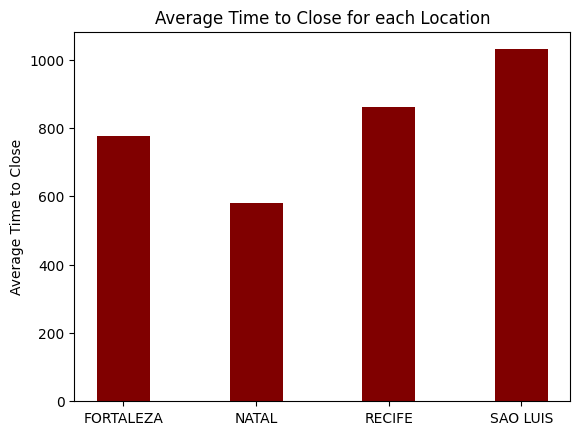

In [11]:
time_average = claims.groupby('Location')['Time to Close'].mean()
plt.bar(time_average.index, time_average, color ='maroon', width = 0.4)
plt.ylabel("Average Time to Close")
plt.title("Average Time to Close for each Location")
plt.show()

### Individuals on Claim

The following boxplot shows the Indiviulas on Claim distribution. There are a few cases with number of individuals higher than 10 individuals on the case. 


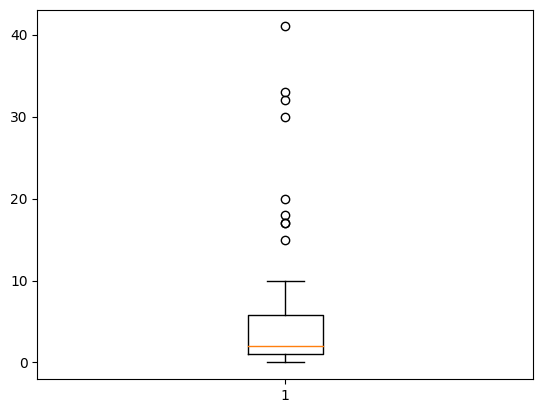

In [12]:
plt.boxplot(claims['Individuals on Claim'])
plt.show()

### Cause 

Almost 80% of this column is unknown. So, it is not a good idea to use this column for obtaining general conclutions. 


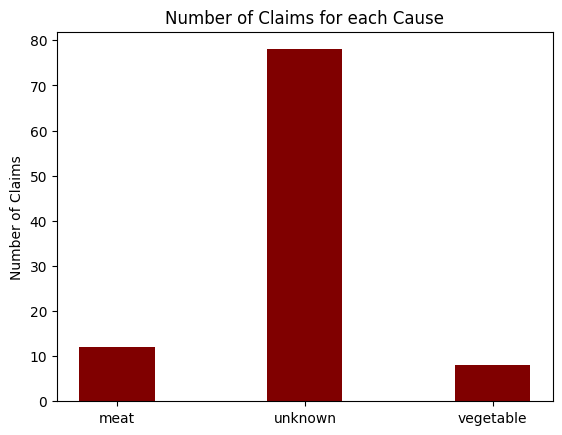

In [13]:
cause = claims.groupby('Cause')['Claim ID'].count()
plt.bar(cause.index, cause, color ='maroon', width = 0.4)
plt.ylabel("Number of Claims")
plt.title("Number of Claims for each Cause")
plt.show()

### Distribution of Claim Amount for each Location

Based on the below figure, the mode of Claim Amount for all the Locations is almost equal. However, the deviation is different. For example, we do not expect to see claims with high amounts in FORTALEZA. 


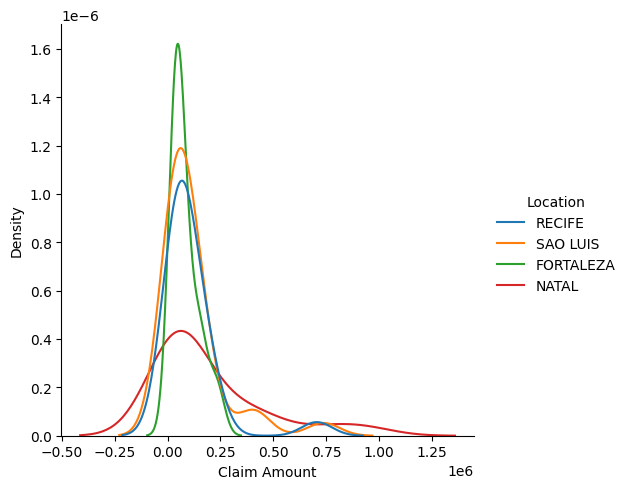

In [14]:
sns.displot(claims, x="Claim Amount", hue="Location", kind="kde", fill=False)
plt.xlabel('Claim Amount')
plt.show()

### Average Individuals on Claim

The averge number of individuals on claim bar plot show that NATAL has a higher average. This could be the reason that in the distribution of the claim amount we could see higher values for NATAL because the cases were more significant ones. 

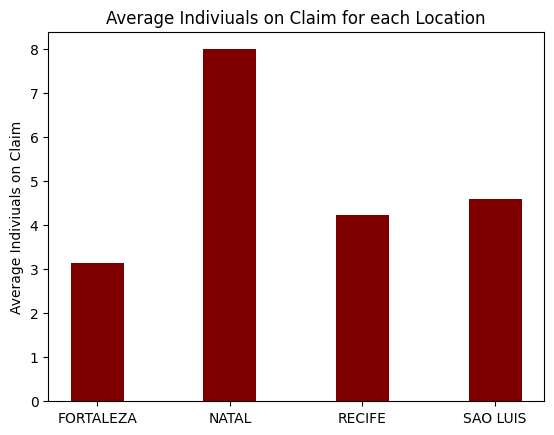

In [15]:
ind = claims.groupby('Location')['Individuals on Claim'].mean()
plt.bar(ind.index, ind, color ='maroon', width = 0.4)
plt.ylabel("Average Indiviuals on Claim")
plt.title("Average Indiviuals on Claim for each Location")
plt.show()

### Average Saved Amount by each location

First, we calculate the percentage of the saved amount for each claim.

Saved = (Claim Amount-Amount Paid)/Claim Amount*100

Then, we take the average for each location. The following shows th results. It does not seem to be a statistically significant difference between the locations. 


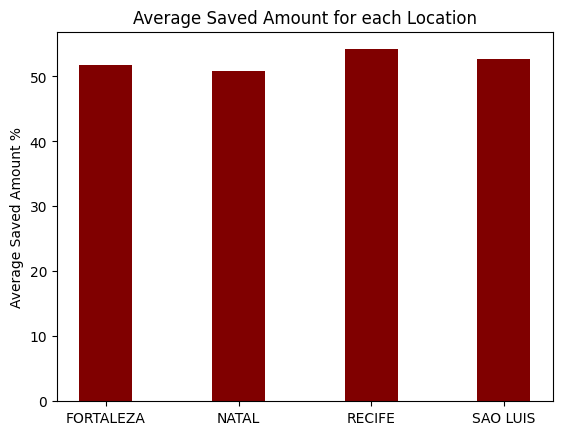

In [16]:
claims['saved'] = (claims['Claim Amount']-claims['Amount Paid'])/claims['Claim Amount']*100
ind = claims.groupby('Location')['saved'].mean()
plt.bar(ind.index, ind, color ='maroon', width = 0.4)
plt.ylabel("Average Saved Amount %")
plt.title("Average Saved Amount for each Location")
plt.show()

## Summary

After data validation, we can see that there is a difference in the time it takes to close
claims across the locations, and NATA<FORTLEZA<RECIFE<SAO LUIS. Time to close claims show that the sample mean and mode are 833.51 and 120, respectively with std equal to 685.42. The average time to close claims across locations is positively correlated with the number of claims for each location. Also, Amount Claim and Individuals on the Claim seem to be positively correlated as expected. However, there is no obvious observation to show that these variables are correlated with Time to Close. Finally, the averge saved amount percentage is calculated for each location to see if the quality of work (as saved amount increases, quality could increase) has any influence on the Claim Close Time, but none could be found. 
                                                        